In [1]:
# This notebook analyses the summary statistics generated in one of the other notebooks.

In [10]:
# We start by importing all the necessary dependencies

import pandas as pd  #The main package we will be using for data analysis. Used to read CSVs/TSVs, work with dataframe objects, and many other things.
import dataframe_image as dfi


import matplotlib.pyplot as plt  #The standard plotting package, used for making nice pretty pictures.
from IPython.display import Image, display

import os  #We might need this to deal with filenames and paths.
import random  #Used to generate random numbers
import numpy as np  #We might need this, it's a pretty standard package. 
import seaborn as sns
from scipy import stats
import glob
import pickle

# This gives us a progress bar for longer computations. 
from tqdm.notebook import tqdm

In [3]:
# Put the location of the data folder on your computer
output_data_location = 'C:/Users/Mark/Code/Locust-Physics/Outputs/Summary_statistics/'

In [4]:
os.chdir(output_data_location)


listOfImageNames = glob.glob("*.png")
listOfPickleNames = glob.glob("*.pkl")

#for imageName in listOfImageNames:
#    display(Image(filename=imageName))

In [5]:
pkl_dict = {}

for file in listOfPickleNames:
    with open(output_data_location + file, 'rb') as f:
        summary_stats = pickle.load(f)
        pkl_dict[f'{file}'] = summary_stats


In [6]:
# Load the dictionary as a dataframe for easy working. Note: the .T method transposes the dataframe (swaps rows and columns)
original_df = pd.DataFrame(pkl_dict).T
df = original_df.copy()
df

,totalframes,framerate,videolength,n_markers,x_min,x_max,y_min,y_max,z_min,z_max,mean_null
cleaned_200_locust_11142022_0002.pkl,96972.0,100.0,969.72,266.0,7.606,2018.495,9.982,3081.341,5.657,380.396,60.672576
cleaned_255_locust_11152022_0001.pkl,60000.0,100.0,600.00,344.0,8.056,1968.230,10.288,3094.906,3.453,372.773,15.061399
cleaned_255_locust_11152022_0002.pkl,60000.0,100.0,600.00,333.0,8.135,1968.227,10.409,3094.924,2.296,373.041,12.253675
cleaned_255_locust_11152022_0003.pkl,60000.0,100.0,600.00,345.0,8.150,1968.211,10.176,3094.901,3.985,373.321,15.416935
cleaned_255_locust_11152022_0004.pkl,60000.0,100.0,600.00,401.0,8.602,1962.233,10.537,3093.622,10.114,382.758,28.755395
cleaned_255_locust_11152022_0005.pkl,60000.0,100.0,600.00,409.0,8.129,1968.286,10.436,3094.886,0.717,373.355,30.794796
cleaned_255_locust_11152022_0006.pkl,60000.0,100.0,600.00,408.0,8.142,1968.304,10.425,3094.815,7.380,373.237,31.146682
cleaned_255_locust_11152022_0008.pkl,60000.0,100.0,600.00,444.0,12.352,1964.723,10.362,3094.432,5.773,383.522,38.479767
cleaned_255_locust_11152022_0009.pkl,60000.0,100.0,600.00,457.0,12.451,1964.740,10.378,3094.435,8.167,383.370,39.897883
cleaned_255_locust_11152022_0010.pkl,60000.0,100.0,600.00,424.0,12.501,1964.737,10.381,3094.440,-2.807,383.355,34.906316


In [7]:
# We clean this up a bit by relabling the index column to be a bit clearer
# First get a list of the indices
# Create a dictionary for relabling. The key:value pairs are old_name:new_name
relabelling_dict = {old_name:(old_name.split("2022")[0][-2:] + '_' + old_name.split(".")[0][-2:] if 'test' not in old_name else 'test_'+old_name.split("2022")[0][-2:] + '_' + old_name.split(".")[0][-2:]) for old_name in df.index.tolist()}

df = df.rename(index=relabelling_dict)
df

,totalframes,framerate,videolength,n_markers,x_min,x_max,y_min,y_max,z_min,z_max,mean_null
14_02,96972.0,100.0,969.72,266.0,7.606,2018.495,9.982,3081.341,5.657,380.396,60.672576
15_01,60000.0,100.0,600.00,344.0,8.056,1968.230,10.288,3094.906,3.453,372.773,15.061399
15_02,60000.0,100.0,600.00,333.0,8.135,1968.227,10.409,3094.924,2.296,373.041,12.253675
15_03,60000.0,100.0,600.00,345.0,8.150,1968.211,10.176,3094.901,3.985,373.321,15.416935
15_04,60000.0,100.0,600.00,401.0,8.602,1962.233,10.537,3093.622,10.114,382.758,28.755395
15_05,60000.0,100.0,600.00,409.0,8.129,1968.286,10.436,3094.886,0.717,373.355,30.794796
15_06,60000.0,100.0,600.00,408.0,8.142,1968.304,10.425,3094.815,7.380,373.237,31.146682
15_08,60000.0,100.0,600.00,444.0,12.352,1964.723,10.362,3094.432,5.773,383.522,38.479767
15_09,60000.0,100.0,600.00,457.0,12.451,1964.740,10.378,3094.435,8.167,383.370,39.897883
15_10,60000.0,100.0,600.00,424.0,12.501,1964.737,10.381,3094.440,-2.807,383.355,34.906316


In [22]:
# This is now much easier to read. The index names are exday_exnumber, prefixed with test if the experiment was a test

# Define an even easier to read df
easy_read_df = df.copy().sort_index()
easy_read_df = easy_read_df.drop(['x_min', 'x_max', 'y_min', 'y_max', 'z_min', 'z_max'], axis=1)
easy_read_df = easy_read_df.drop(['test_15_01', 'test_15_02', 'test_15_03', 'test_16_05'], axis=0)
easy_read_df['totalframes'] = easy_read_df['totalframes']/1000
easy_read_df['videolength'] = easy_read_df['videolength']/60

easy_read_df['usable_data'] = (1 - easy_read_df['mean_null']/100)*easy_read_df['n_markers']*easy_read_df['totalframes']

easy_read_df = easy_read_df.rename(columns = {'totalframes':'Total_Frame(1000s)', 'videolength':'videolength(mins)'})
formatter_dict={"Total_Frame(1000s)": "{:.0f}", 
           'framerate':'{:.0f}', 
           'videolength(mins)':'{:.0f}', 
           'n_markers':'{:.0f}',
           'mean_null':'{:.1f}'}

readable_table = easy_read_df.style.format(formatter_dict)\
    .set_properties(**{'text-align': 'center'})\
    .background_gradient(subset=['n_markers','mean_null', 'usable_data'])
readable_table

,Total_Frame(1000s),framerate,videolength(mins),n_markers,mean_null,usable_data
14_02,97,100,16,266,60.7,10144.332804
15_01,60,100,10,344,15.1,17531.327280
15_02,60,100,10,333,12.3,17531.715735
15_03,60,100,10,345,15.4,17508.694387
15_04,60,100,10,401,28.8,17141.452079
15_05,60,100,10,409,30.8,16982.956959
15_06,60,100,10,408,31.1,16855.292336
15_08,60,100,10,444,38.5,16388.989953
15_09,60,100,10,457,39.9,16480.000577
15_10,60,100,10,424,34.9,16559.833263


In [23]:
dfi.export(readable_table,"mytable.png")



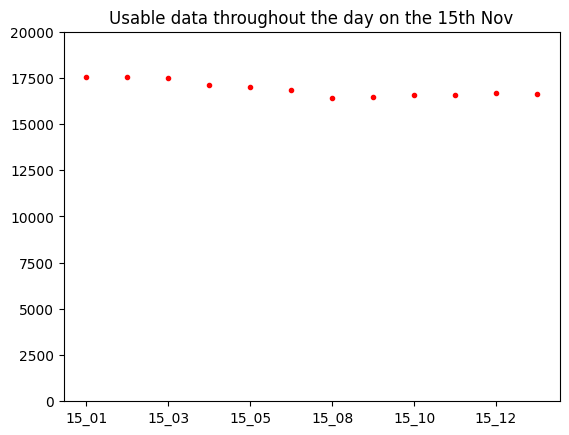

In [48]:
ax = easy_read_df['usable_data'].iloc[1:-3].plot(style="o", ms=3, color='red')
ax.set_ylim(0,20000)
plt.title('Usable data throughout the day on the 15th Nov')
plt.show()

'C:\\Users\\Mark\\Code\\Locust-Physics\\Outputs\\Summary_statistics'